# Test on whole cochlea 

## Import packages

In [4]:
from monai.utils import first, set_determinism
from monai.transforms import (
    AsDiscrete,
    AsDiscreted,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    SaveImaged,
    ScaleIntensityRanged,
    Spacingd,
    EnsureTyped,
    EnsureType,
    Invertd,
)
#from monai.handlers.utils import from_engine
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.metrics import DiceMetric
from monai.losses import DiceLoss
from monai.inferers import sliding_window_inference
from monai.data import CacheDataset, decollate_batch
from monai.config import print_config
from monai.apps import download_and_extract

In [1]:
import os
import glob


import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import nibabel as nib

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Upsample

from torch.optim import Adam, SGD
from torch.utils.data import TensorDataset, ConcatDataset, DataLoader
from functools import partial

import time

from skimage.measure import block_reduce
import scipy

## Check GPU

In [2]:
cuda = torch.cuda.is_available()
print("GPU available:", cuda)

GPU available: True


## Set random seed for reproducibility

In [5]:
torch.manual_seed(4460)
np.random.seed(4460)
set_determinism(seed=4460)

## Read Original imge and GT

In [2]:
datadir = 'D:\\Chaoqun_cochlea_microCT\\EM\\data'
IMGDIR = os.path.join(datadir, 'cochlea_img_pad.npy')
MASKDIR = os.path.join(datadir, 'cochlea_mask_pad.npy')

In [3]:
img_file = np.load(IMGDIR)
#mask_file = np.load(MASKDIR)

In [11]:

#img_file = img_file[704:,:,:]
#mask_file = mask_file[704:,:,:]

In [5]:
img = img_file.astype('float32')

In [6]:
nif = nib.Nifti1Image(img, affine=np.eye(4))
nib.save(nif, 'D:\\Chaoqun_cochlea_microCT\\EM\\data\\cochlea_pad.nii')

# result post-processing

## read results and argmax

In [13]:
# resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
# output11 = np.load(os.path.join(resultdir, 'overal_output11.npz'))
# output12 = np.load(os.path.join(resultdir, 'overal_output12.npz'))
# output13 = np.load(os.path.join(resultdir, 'overal_output13.npz'))
# output11 = output11['pred']
# output12 = output12['pred']
# output13 = output13['pred']
# output1 = output11+output12+output13
# #overal_output_sm=scipy.special.softmax(overal_output, axis=0)
# overal_output_pred1 = np.argmax(output1,axis=0)

In [3]:
# resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
# output21 = np.load(os.path.join(resultdir, 'overal_output2_0_3779.npz'))
# output22 = np.load(os.path.join(resultdir, 'overal_output2_3780_7559.npz'))
# output23 = np.load(os.path.join(resultdir, 'overal_output2_7560_11339.npz'))
# output21 = output21['pred']
# output22 = output22['pred']
# output23 = output23['pred']
# overal_output2 = output21+output22+output23
# #overal_output_sm=scipy.special.softmax(overal_output, axis=0)
# overal_output_pred2 = np.argmax(overal_output2,axis=0)

In [4]:
# resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
# output31 = np.load(os.path.join(resultdir, 'overal_output3_0_3570.npz'))
# output32 = np.load(os.path.join(resultdir, 'overal_output3_3570_7140.npz'))
# output33 = np.load(os.path.join(resultdir, 'overal_output3_7140_10710.npz'))
# output31 = output31['pred']
# output32 = output32['pred']
# output33 = output33['pred']
# overal_output3 = output31+output32+output33
# #overal_output_sm=scipy.special.softmax(overal_output, axis=0)
# overal_output_pred3 = np.argmax(overal_output3,axis=0)

In [4]:
#resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
# output41 = np.load(os.path.join(resultdir, 'overal_output4_0_3213.npz'))
# output42 = np.load(os.path.join(resultdir, 'overal_output4_3213_6426.npz'))
# output43 = np.load(os.path.join(resultdir, 'overal_output4_6426_9639.npz'))
# overal_output41 = output41['pred']
# overal_output42 = output42['pred']
# overal_output43 = output43['pred']
# overal_output4 = overal_output41+overal_output42+overal_output43
#overal_output_sm=scipy.special.softmax(overal_output, axis=0)
#overal_output_pred4= np.argmax(overal_output4,axis=0)

In [3]:
resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
output51 = np.load(os.path.join(resultdir, 'overal_output51.npz'))
output52 = np.load(os.path.join(resultdir, 'overal_output52.npz'))
output53 = np.load(os.path.join(resultdir, 'overal_output53.npz'))
output51 = output51['pred']
output52 = output52['pred']
output53 = output53['pred']
output5 = output51+output52+output53
output5 = np.argmax(output5,axis=0)

In [6]:
resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
output61 = np.load(os.path.join(resultdir, 'overal_output61.npz'))
output62 = np.load(os.path.join(resultdir, 'overal_output62.npz'))
output63 = np.load(os.path.join(resultdir, 'overal_output63.npz'))
output61 = output61['pred']
output62 = output62['pred']
output63 = output63['pred']
output6 = output61+output62+output63
output6 = np.argmax(output6,axis=0)

In [2]:
resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
output71 = np.load(os.path.join(resultdir, 'overal_output71.npz'))
output72 = np.load(os.path.join(resultdir, 'overal_output72.npz'))
output73 = np.load(os.path.join(resultdir, 'overal_output73.npz'))
output71 = output71['pred']
output72 = output72['pred']
output73 = output73['pred']
output7 = output71+output72+output73
output7 = np.argmax(output7, axis=0)

In [5]:
resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
output81 = np.load(os.path.join(resultdir, 'overal_output81.npz'))
output82 = np.load(os.path.join(resultdir, 'overal_output82.npz'))
output83 = np.load(os.path.join(resultdir, 'overal_output83.npz'))
output81 = output81['pred']
output82 = output82['pred']
output83 = output83['pred']
output8 = output81+output82+output83
output8 = np.argmax(output8, axis=0)

In [6]:
print(output8.shape)

(608, 576, 896)


In [7]:
np.savez_compressed('D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1\\pred8',pred = output8)

## combine outputs

In [2]:
resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
output1 = np.load(os.path.join(resultdir, 'pred5.npz'))
output1 = output1['pred']

In [3]:
output2 = np.load(os.path.join(resultdir, 'pred6.npz'))
output2 = output2['pred']

In [4]:
output3 = np.load(os.path.join(resultdir, 'pred7.npz'))
output3 = output3['pred']
#overal_output_sm=scipy.special.softmax(overal_output, axis=0)
#overal_output_pred3 = np.argmax(overal_output3,axis=0)

In [5]:
output4 = np.load(os.path.join(resultdir, 'pred8.npz'))
output4 = output4['pred']
#overal_output_sm=scipy.special.softmax(overal_output, axis=0)
#overal_output_pred4 = np.argmax(overal_output4,axis=0)

In [6]:
output12 = np.concatenate((output1, output2), axis=2)
output34 = np.concatenate((output3, output4), axis=2)
overal_output_pred = np.concatenate((output12, output34), axis=1)

In [7]:
print(output1.shape)
print(overal_output_pred.shape)
print(overal_output_pred[100,200,:])

(608, 672, 992)
(608, 1248, 1888)
[0 0 0 ... 1 1 1]


In [8]:
np.savez_compressed('D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1\\pred_half2',pred = overal_output_pred)

## Prediction plots

132


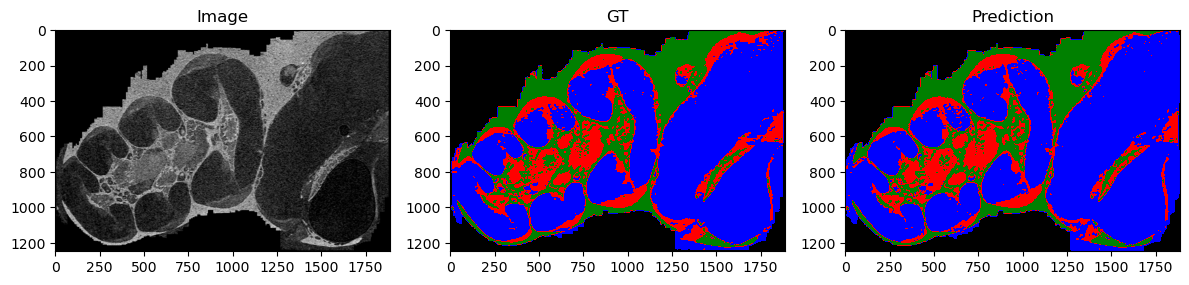

In [19]:
sample = np.random.randint(0, 608)
img = img_file[sample,:,:]
label = mask_file[sample,:,:]
pred = overal_output_pred[sample,:,:]
print(sample)
plt.figure(figsize=(12, 8), dpi=100)
plt.subplot(1,3,1)
plt.title('Image')
plt.imshow(img,cmap = 'gray')
plt.axis('on')
plt.tight_layout()

#black: background, blue: fluid, red: tissue, green: bone
colors = ['black','blue','red','green']
plt.subplot(1,3,2)
plt.title('GT')
plt.imshow(label, cmap = ListedColormap(colors))
plt.axis('on')
plt.tight_layout()

plt.subplot(1,3,3)
plt.title('Prediction')
plt.imshow(pred, cmap = ListedColormap(colors))
plt.axis('on')
plt.tight_layout()
plt.show()

# save ct scan prediction to nifti

In [3]:
# concatate first with second half along x
resultdir = 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1'
half1 = np.load(os.path.join(resultdir, 'pred_half1.npz'))
half1 = half1['pred']
half2 = np.load(os.path.join(resultdir, 'pred_half2.npz'))
half2 = half2['pred']
pred = np.concatenate((half1, half2), axis=0)
pred_in8 = pred.astype('int8')

In [16]:
# save as nifti
nif = nib.Nifti1Image(pred_in8, affine=np.eye(4))
nib.save(nif, 'D:\\Chaoqun_cochlea_microCT\\EM\\test_results\\RESATTU-NET_results_scan1\\resattu_pred.nii')

# Pad original scan and saperate into smaller sub volumes for test data

In [17]:
#np.savez_compressed('D:\\Chaoqun_cochlea_microCT\\EM\\data\\cochlea_pad8', img=img_file, mask=mask_file)

# #padding x
# if (img.shape[0]-64)%32 != 0:
#     padding = int((((img.shape[0]-kernal)//stride+1)*stride+kernal-img.shape[0])/2)
#     img=np.pad(img, ((padding, padding), (0,0), (0, 0)), 'constant', constant_values=[(0, 0),(0,0),(0,0)])
#     mask=np.pad(mask, ((padding, padding), (0,0), (0, 0)), 'constant', constant_values=[(0, 0),(0,0),(0,0)])

# #padding y
# if (img.shape[1]-64)%32 != 0:
#     padding = int((((img.shape[1]-kernal)//stride+1)*stride+kernal-img.shape[1])/2)
#     img=np.pad(img, ((0,0), (padding, padding), (0, 0)), 'constant', constant_values=[(0, 0),(0,0),(0,0)])
#     mask=np.pad(mask, ((0,0), (padding, padding), (0, 0)), 'constant', constant_values=[(0, 0),(0,0),(0,0)])

# #padding z
# if (img.shape[2]-64)%32 != 0:
#     padding = int((((img.shape[2]-kernal)//stride+1)*stride+kernal-img.shape[2])/2)
#     img=np.pad(img, ((0,0), (0, 0), (padding, padding)), 'constant', constant_values=[(0, 0),(0,0),(0,0)])
#     mask=np.pad(mask, ((0,0), (0, 0), (padding, padding)), 'constant', constant_values=[(0, 0),(0,0),(0,0)])

# saperate cochlea into 8 parts
# img_file1 = img_file[0:704,0:672,0:992]
# mask_file1 = mask_file[0:704,0:672,0:992]

# img_file2 = img_file[0:704,0:672,992:1888]
# mask_file2 = mask_file[0:704,0:672,992:1888]

# img_file3 = img_file[0:704,672:1248,0:992]
# mask_file3 = mask_file[0:704,672:1248,0:992]

# img_file4 = img_file[0:704,672:1248,992:1888]
# mask_file4 = mask_file[0:704,672:1248,992:1888]

# img_file5 = img_file[704:1312,0:672,0:992]
# mask_file5 = mask_file[704:1312,0:672,0:992]

# img_file6 = img_file[704:1312,0:672,992:1888]
# mask_file6 = mask_file[704:1312,0:672,992:1888]

# img_file7 = img_file[704:1312,672:1248,0:992]
# mask_file7 = mask_file[704:1312,672:1248,0:992]

# img_file8 = img_file[704:1312,672:1248,992:1888]
# mask_file8 = mask_file[704:1312,672:1248,992:1888]
# print(img_file8.shape,mask_file8.shape)

#print(img.shape, mask.shape)
#mask = mask.astype('int')
#mask1=np.pad(mask1, ((293,293), (316,316), (0, 0)), 'constant', constant_values=[(0, 0),(0,0),(0,0)])
#mask1.shape

# np.save('cochlea_img_pad1',img_file1)
# np.save('cochlea_mask_pad1',mask_file1)
# np.save('cochlea_img_pad2',img_file2)
# np.save('cochlea_mask_pad2',mask_file2)
# np.save('cochlea_img_pad3',img_file3)
# np.save('cochlea_mask_pad3',mask_file3)
# np.save('cochlea_img_pad4',img_file4)
# np.save('cochlea_mask_pad4',mask_file4)
# np.save('cochlea_img_pad5',img_file5)
# np.save('cochlea_mask_pad5',mask_file5)
# np.save('cochlea_img_pad6',img_file6)
# np.save('cochlea_mask_pad6',mask_file6)
# np.save('cochlea_img_pad7',img_file7)
# np.save('cochlea_mask_pad7',mask_file7)
# np.save('cochlea_img_pad8',img_file8)
# np.save('cochlea_mask_pad8',mask_file8)